In [2]:
# Load in some packages
import matplotlib
%matplotlib inline
import numpy as np
import pandas as pd
import os

Data Exploration and Cleaning

In [3]:
# Reading Data
callcenter= pd.read_csv("CallCenterData.csv")

In [4]:
#check dimensions
callcenter.shape

(46632, 18)

In [5]:
# Check data types
callcenter.dtypes

Call ID         float64
Call Date        object
Customer ID      object
Priority         object
Query Type      float64
IVR start        object
IVR fin          object
IVR time        float64
Queue start      object
Queue fin        object
Queue time      float64
Agent?           object
Agent start      object
Agent end        object
Agent time      float64
Agent Name       object
Satisfaction    float64
Resolved         object
dtype: object

In [6]:
# viewing the top 5 rows of data
callcenter.head(5)

,Call ID,Call Date,Customer ID,Priority,Query Type,IVR start,IVR fin,IVR time,Queue start,Queue fin,Queue time,Agent?,Agent start,Agent end,Agent time,Agent Name,Satisfaction,Resolved
0,68269.0,7/1/2017,CRN287429,Medium,3.0,6:56:28,6:56:30,2.0,0:00:00,0:00:00,0.0,YES,6:56:29,6:56:35,6.0,Stevens,3.0,Yes
1,68272.0,7/1/2017,NaN,Low,4.0,7:54:35,7:54:49,14.0,0:00:00,0:00:00,0.0,YES,7:54:50,7:54:54,4.0,Adams,4.0,Yes
2,68273.0,7/1/2017,CRN446217,Low,1.0,7:56:33,7:56:42,9.0,0:00:00,0:00:00,0.0,YES,7:56:41,7:57:54,73.0,Berkhart,4.0,Yes
3,68276.0,7/1/2017,CRN297556,Low,1.0,8:00:53,8:01:03,10.0,0:00:00,0:00:00,0.0,YES,8:01:02,8:02:58,116.0,Adams,4.0,Yes
4,68278.0,7/1/2017,CRN553214,Low,1.0,8:03:18,8:03:27,9.0,0:00:00,0:00:00,0.0,YES,8:03:26,8:09:46,380.0,Berkhart,4.0,Yes


In [7]:
# Get an overview about the data 
# Note describe function drops the non numeric values so aware
callcenter.describe()

,Call ID,Query Type,IVR time,Queue time,Agent time,Satisfaction
count,46380.000000,46380.000000,46380.000000,46380.000000,46380.000000,46380.000000
mean,114745.675679,1.633204,9.441548,55.152436,175.716235,3.011276
std,26846.102127,1.148817,27.508372,96.973548,255.112883,1.458860
min,68269.000000,1.000000,-362.000000,0.000000,0.000000,0.000000
25%,91514.750000,1.000000,6.000000,0.000000,52.000000,2.000000
50%,114652.500000,1.000000,9.000000,8.000000,107.000000,3.000000
75%,138034.750000,2.000000,10.000000,71.000000,211.000000,4.000000
max,161286.000000,5.000000,4832.000000,2405.000000,12510.000000,5.000000


Explore some variables to see if we keep it or not

In [8]:
callcenter["Customer ID"][0:15]

0     CRN287429
1           NaN
2     CRN446217
3     CRN297556
4     CRN553214
5     CRN044201
6     CRN244721
7     CRN140246
8     CRN802435
9     CRN207034
10    CRN006100
11          NaN
12    CRN580146
13    CRN240575
14    CRN443474
Name: Customer ID, dtype: object

In [9]:
callcenter["Customer ID"].describe()

count         38714
unique        10551
top       CRN579256
freq            240
Name: Customer ID, dtype: object

In [10]:
# Customer ID doesn't provide us with any info so we gonna remove it 

In [11]:
del callcenter["Customer ID"]

In [12]:
#show Data after removing the Customer ID
callcenter.head(5)

,Call ID,Call Date,Priority,Query Type,IVR start,IVR fin,IVR time,Queue start,Queue fin,Queue time,Agent?,Agent start,Agent end,Agent time,Agent Name,Satisfaction,Resolved
0,68269.0,7/1/2017,Medium,3.0,6:56:28,6:56:30,2.0,0:00:00,0:00:00,0.0,YES,6:56:29,6:56:35,6.0,Stevens,3.0,Yes
1,68272.0,7/1/2017,Low,4.0,7:54:35,7:54:49,14.0,0:00:00,0:00:00,0.0,YES,7:54:50,7:54:54,4.0,Adams,4.0,Yes
2,68273.0,7/1/2017,Low,1.0,7:56:33,7:56:42,9.0,0:00:00,0:00:00,0.0,YES,7:56:41,7:57:54,73.0,Berkhart,4.0,Yes
3,68276.0,7/1/2017,Low,1.0,8:00:53,8:01:03,10.0,0:00:00,0:00:00,0.0,YES,8:01:02,8:02:58,116.0,Adams,4.0,Yes
4,68278.0,7/1/2017,Low,1.0,8:03:18,8:03:27,9.0,0:00:00,0:00:00,0.0,YES,8:03:26,8:09:46,380.0,Berkhart,4.0,Yes


# Now We will do some of transformation on variables

In [13]:
# Call ID it int not float so we gonna change it into int 
new_datatype= callcenter["Call ID"].astype("Int64")
callcenter["Call ID"] = new_datatype

In [14]:
# priority column is category so we gonna change it into Categorical
new_category= pd.Categorical(callcenter["Priority"], ordered=True)
new_category= new_category.rename_categories(['High','Medium','Low'])
callcenter["Priority"]= new_category

In [15]:
callcenter["Priority"].describe()

count      46380
unique         3
top       Medium
freq       25709
Name: Priority, dtype: object

In [16]:
callcenter["Priority"][0:15]

0        Low
1     Medium
2     Medium
3     Medium
4     Medium
5     Medium
6     Medium
7     Medium
8     Medium
9     Medium
10      High
11       Low
12       Low
13    Medium
14      High
Name: Priority, dtype: category
Categories (3, object): ['High' < 'Medium' < 'Low']

In [17]:
# change Call Date into date 
new_type = pd.to_datetime(callcenter["Call Date"])
callcenter["Call Date"]= new_type

In [18]:
#change query type column into int64
query_new= callcenter["Query Type"].astype("int32")
callcenter["Query Type"]= query_new

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [ ]:
callcenter.dtypes

Call ID                  Int64
Call Date       datetime64[ns]
Priority              category
Query Type               Int64
IVR start               object
IVR fin                 object
IVR time               float64
Queue start             object
Queue fin               object
Queue time             float64
Agent?                  object
Agent start             object
Agent end               object
Agent time             float64
Agent Name              object
Satisfaction           float64
Resolved                object
dtype: object

In [ ]:
# Change Satisfaction data type from float into int32 
Satisfaction_new= callcenter["Satisfaction"].astype("Int32")
callcenter["Satisfaction"]= Satisfaction_new

 Data types before 
Call ID         float64
Call Date        object
Customer ID      object
Priority         object
Query Type      float64
IVR start        object
IVR fin          object
IVR time        float64
Queue start      object
Queue fin        object
Queue time      float64
Agent?           object
Agent start      object
Agent end        object
Agent time      float64
Agent Name       object
Satisfaction    float64
Resolved         object
dtype: object

In [ ]:
# Data types after 
callcenter.dtypes

Call ID                  Int64
Call Date       datetime64[ns]
Priority              category
Query Type               Int64
IVR start               object
IVR fin                 object
IVR time               float64
Queue start             object
Queue fin               object
Queue time             float64
Agent?                  object
Agent start             object
Agent end               object
Agent time             float64
Agent Name              object
Satisfaction             Int32
Resolved                object
dtype: object

In [ ]:
# when I was nagivating the null values I found that csv file contains addtional empty rows so I used this step to remove them
callcenter= callcenter.drop(callcenter.tail(252).index)

In [ ]:
callcenter.isnull().any()

Call ID         False
Call Date       False
Priority        False
Query Type      False
IVR start       False
IVR fin         False
IVR time        False
Queue start     False
Queue fin       False
Queue time      False
Agent?          False
Agent start     False
Agent end       False
Agent time      False
Agent Name       True
Satisfaction    False
Resolved        False
dtype: bool

In [ ]:
# In above there are null values in Agent Name column so we gonna nagivate it 
missing= np.where(callcenter['Agent Name'].isnull()==True)

In [ ]:
len(missing[0])

4174

As you can see in above there are 4174 in Agent Name coulmn but we are not going to remove them, because they mean in our dataset that Agent has abundented the call.

In [ ]:
# Check for duplicates
callcenter['Call ID'].is_unique

False

In [20]:
# As you can see above there are some duplicates so we gonna nagivate them 
duplicates= callcenter['Call ID'].duplicated(keep=False)


In [ ]:
callcenter[duplicates]

,Call ID,Call Date,Priority,Query Type,IVR start,IVR fin,IVR time,Queue start,Queue fin,Queue time,Agent?,Agent start,Agent end,Agent time,Agent Name,Satisfaction,Resolved
10093,88498,2017-08-08,Medium,4,16:05:02,16:05:12,10.0,16:05:12,16:05:38,26.0,YES,16:05:38,16:07:56,138.0,Adams,2,Yes
46379,88498,2017-12-31,Medium,1,13:57:08,13:57:19,11.0,0:00:00,0:00:00,0.0,YES,13:57:18,13:58:46,88.0,Stevens,3,Yes


To keep our call ID unique we gonna remove one of these rows

In [ ]:
callcenter.drop(index=46379, inplace=True)

In [ ]:
# let's check again 
callcenter['Call ID'].is_unique


True

We gonna extrack some columns from variabel date year, month, day.

In [ ]:
#Year
callcenter['Year']= callcenter['Call Date'].dt.year

In [ ]:
# Month
callcenter['Month']= callcenter['Call Date'].dt.month

In [ ]:
#Day
callcenter['Day']= callcenter['Call Date'].dt.day

# Plotting some charts 

array([[<Axes: title={'center': 'Query Type'}>]], dtype=object)

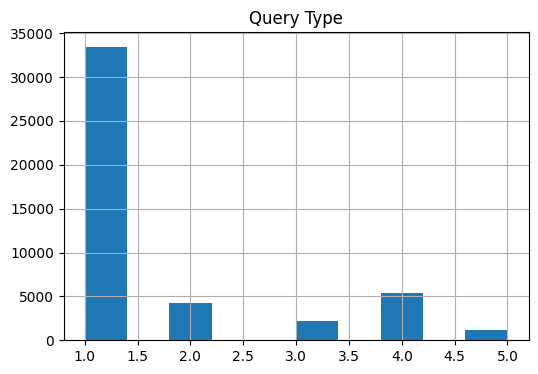

In [ ]:
# Histograms
callcenter.hist(column='Query Type', figsize=(6,4))

<Axes: ylabel='Density'>

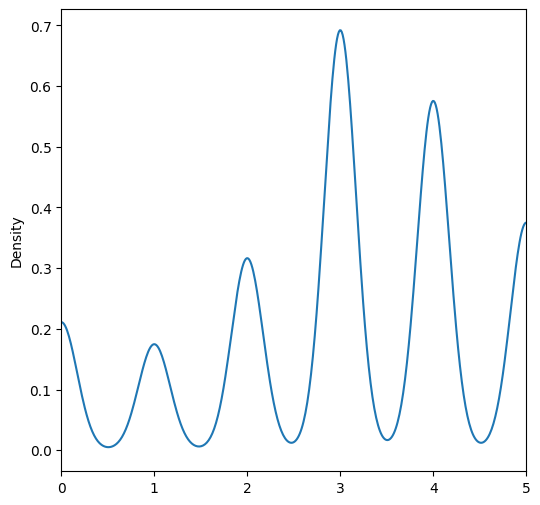

In [ ]:
# Density Plot
callcenter['Satisfaction'].plot(kind='density', figsize=(6,6),xlim=(0,5), xlabel="Satisfication", ylabel="Frequency")

In [ ]:
# barplot
AgentNameBar_table= pd.crosstab(index=callcenter['Agent Name'], columns="count")
AgentNameBar_table

col_0,count
Agent Name,
Adams,9566
Berkhart,8689
Daniels,1723
DuPreez,8083
Ellis,1214
Grojovin,1463
Katz,2486
Stevens,8981


<Axes: title={'center': 'Number of calls by Agent'}, xlabel='Agent Name', ylabel='Count of calls'>

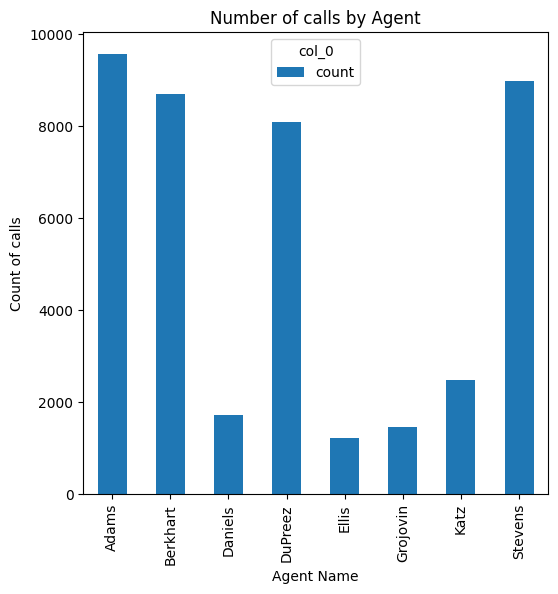

In [ ]:
AgentNameBar_table.plot(kind='bar', figsize=(6,6), ylabel="Count of calls", title="Number of calls by Agent")

In [ ]:
AgentNameWithPriorityBar_table= pd.crosstab(index=callcenter['Agent Name'], columns=callcenter['Priority'])
AgentNameWithPriorityBar_table

Priority,High,Medium,Low
Agent Name,,,
Adams,2859,5321,1386
Berkhart,2470,5024,1195
Daniels,760,613,350
DuPreez,1786,5320,977
Ellis,441,532,241
Grojovin,475,640,348
Katz,739,1472,275
Stevens,3023,4318,1640


<Axes: title={'center': 'Calls by Priority Across Agents'}, xlabel='Agent Name'>

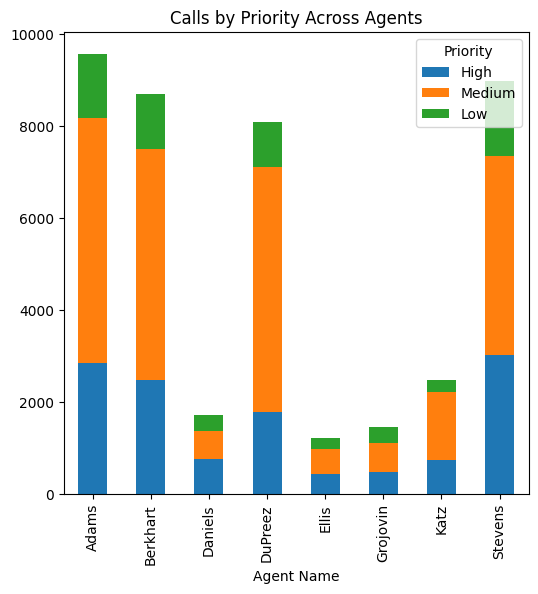

In [ ]:
AgentNameWithPriorityBar_table.plot(kind='bar', figsize=(6,6), stacked=True, title="Calls by Priority Across Agents")

<Axes: title={'center': 'Number of Calls Across The 7 Months'}, xlabel='Month'>

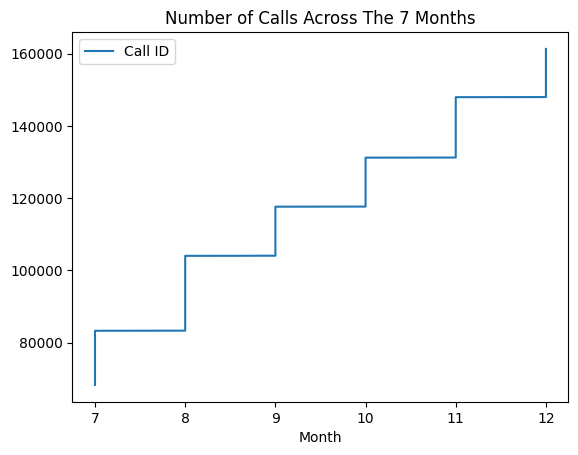

In [ ]:
# Line chart to see number of calls across the 7 Months 
callcenter.plot(x="Month", y='Call ID', title="Number of Calls Across The 7 Months")